In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
PROJECT_PATH = '../'
import sys
sys.path.insert(0, PROJECT_PATH)

In [502]:
from PIML.box.boxWR import BoxWR

In [503]:
b = BoxWR()

#220 R=1000.00
(2204,) (220,)
sky_H (2204,)
snr2nl-SN [117.48897989212539, 123.16229361336093, 120.33565696776952, 98.8894386351706, 84.25218133385484, 71.75295764285396, 63.04060283820937, 39.552500618318795, 21.888181176472436, 8.51317591907856, 5.2393267192169395]
Top10 eigs [105.32   7.07   5.2    1.44   1.21   0.76   0.57   0.49   0.35   0.28]
Building RBF with gaussan kernel on data shape (2880,)
Building RBF with gaussan kernel on data shape (2880, 10)


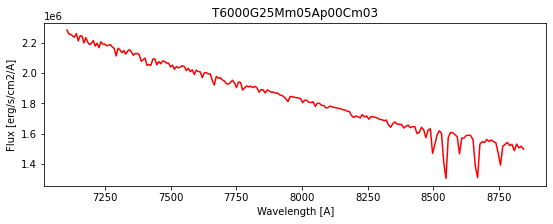

In [504]:
W="RedM"; R="R"; Res=5000;step=10;
b.init(W,R, Res,step, onPCA=1)